<a href="https://colab.research.google.com/github/Shankar-Pankhania/Twitter_Sentiment_Analysis_on_Bitcoin/blob/main/Train_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Dissertation/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Dissertation


Import the packages


In [ ]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Read dataset

In [ ]:
total_dataset = pd.read_csv('bitcoin_tweets.csv')
total_dataset = total_dataset[total_dataset.sentiment != 0] #remove neutral tweets, only need positve and negative sentiments.
total_dataset['sentiment'] = total_dataset['sentiment'].replace(-1, 0) #replaces negative sentiment -1 with 0 for analysis

Count *Vectorizer*

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
vectorized_data = count_vectorizer.fit_transform(total_dataset['processed_tweet'].values.astype('U')) 

TF-IDF Vectorizer

In [ ]:
#The code below has been commented out because we will be using count vectorizer for this sentiment analysis.

#tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2)) # Unigram and Bigram
#vectorized_data = tf_idf_vectorizer.fit_transform(total_dataset['processed_tweet'])

Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, total_dataset['sentiment'], test_size=0.2, random_state=69)

K Fold Cross Validation for Naive Bayes

In [ ]:
#The code below has been commented out because we will be using test/train split for this sentiment analysis. If you would like to check, please uncomment the code and comment the test/train split code and run the whole code again.

#kfold = model_selection.KFold(n_splits=10, random_state=None)
#model_kfold = LogisticRegression(solver='liblinear', random_state=0)
#results_kfold = model_selection.cross_val_score(model_kfold, vectorized_data, total_dataset['sentiment'], cv=kfold)
#print("Accuracy: " + str(results_kfold.mean())) 

Logistic *regression*

In [ ]:
# liblinear solver (L1 regularization) has been used for this classifier as we have a high dimension dataset.
logisticRegr = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
predicted_logisticRegr = logisticRegr.predict(X_test)

Confusion Matrix

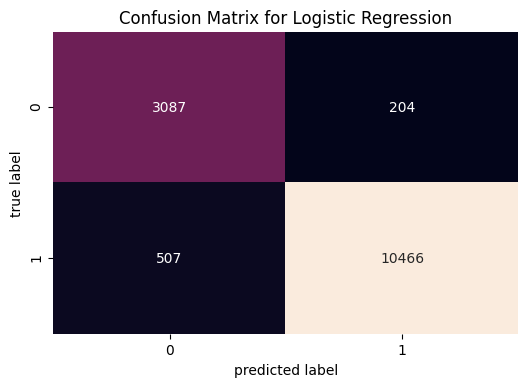

In [ ]:
plt.figure(dpi=100) #plot high quality matrix
mat = confusion_matrix(y_test, predicted_logisticRegr)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

Normalized Confusion Matrix

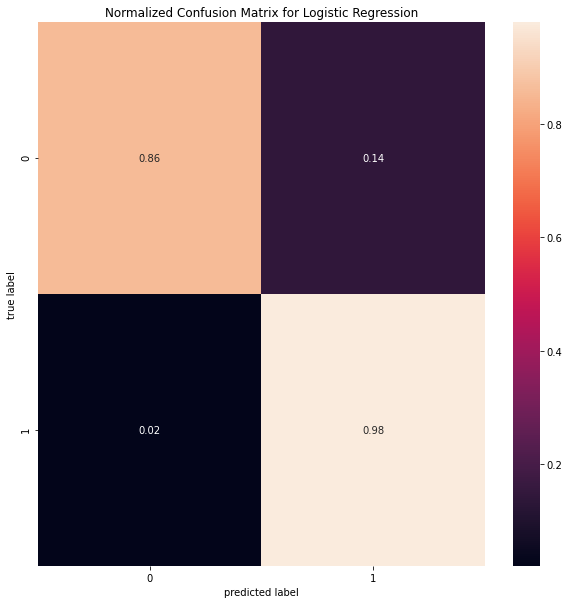

In [ ]:
cm = confusion_matrix(y_test, predicted_logisticRegr)

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.title('Normalized Confusion Matrix for Logistic Regression')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show(block=False)

Accuracy

In [ ]:
score_logistic= accuracy_score(predicted_logisticRegr, y_test)
print("Accuracy with Logistic Regression: ",score_logistic)

Accuracy with Logistic Regression:  0.9501542344363433


Precision, Recall, and Accuracy

In [ ]:
print(classification_report(y_test, predicted_logisticRegr))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3594
           1       0.95      0.98      0.97     10670

    accuracy                           0.95     14264
   macro avg       0.95      0.92      0.93     14264
weighted avg       0.95      0.95      0.95     14264



ROC curve

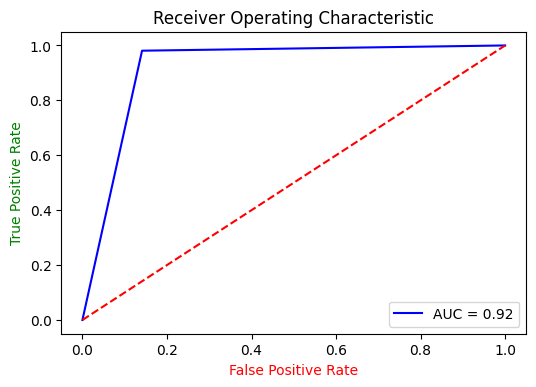

In [ ]:
# calculates the fpr and tpr for the classifications
fpr, tpr, threshold = roc_curve(y_test, predicted_logisticRegr)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=100)                       # this plots a high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.show()